## Import Statements

In [69]:
import pandas as pd
import matplotlib.pyplot as plt

## Data Exploration

In [12]:
df = pd.read_csv('QueryResults (1).csv',names=['DATE', 'TAG', 'POSTS'], header=0)
df

,DATE,TAG,POSTS
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,c,83
3,2008-08-01 00:00:00,c#,505
4,2008-08-01 00:00:00,c++,164
...,...,...,...
2547,2023-11-01 00:00:00,php,1646
2548,2023-11-01 00:00:00,python,9503
2549,2023-11-01 00:00:00,r,2114
2550,2023-11-01 00:00:00,ruby,166


In [13]:
df.head()

,DATE,TAG,POSTS
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,c,83
3,2008-08-01 00:00:00,c#,505
4,2008-08-01 00:00:00,c++,164


In [14]:
df.tail()

,DATE,TAG,POSTS
2547,2023-11-01 00:00:00,php,1646
2548,2023-11-01 00:00:00,python,9503
2549,2023-11-01 00:00:00,r,2114
2550,2023-11-01 00:00:00,ruby,166
2551,2023-11-01 00:00:00,swift,931


In [15]:
df.shape

(2552, 3)

In [18]:
df.count()

DATE     2552
TAG      2552
POSTS    2552
dtype: int64

**Question**:
Which Programming language has had the highest total number of posts of all time?

In [39]:
post_per_language = df.groupby('TAG').sum()
post_per_language[['POSTS']].sort_values('POSTS', ascending=False)

,POSTS
TAG,
javascript,2516924
python,2172281
java,1910306
c#,1606926
php,1461948
c++,801783
r,500326
c,401121
swift,331245


Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Question**: How many months of data exist per language? Which language had the fewest months with an entry? 


In [40]:
months_per_language = df.groupby('TAG')
months_per_language[['DATE']].count().sort_values('DATE')

,DATE
TAG,
go,169
swift,176
r,182
assembly,184
c,184
c++,184
delphi,184
java,184
javascript,184


## Data Cleaning


In [41]:
df['DATE'][1]

'2008-08-01 00:00:00'

In [42]:
type(df['DATE'][1])

str

In [48]:
df['DATE'] = pd.to_datetime(df['DATE'])
df.head()

,DATE,TAG,POSTS
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,c,83
3,2008-08-01,c#,505
4,2008-08-01,c++,164


## Data Manipulation



In [51]:
test_df = pd.DataFrame({'Age': ['Young', 'Young', 'Young', 'Young', 'Old', 'Old', 'Old', 'Old'],
                       'Actor': ['Jack', 'Arnold', 'Keanu', 'Sylvester', 'Jack', 'Arnold', 'Keanu', 'Sylvester'],
                       'Power': [100, 80, 25, 50, 99, 75, 5, 30]})
test_df

,Age,Actor,Power
0,Young,Jack,100
1,Young,Arnold,80
2,Young,Keanu,25
3,Young,Sylvester,50
4,Old,Jack,99
5,Old,Arnold,75
6,Old,Keanu,5
7,Old,Sylvester,30


In [53]:
pivoted_test_df = test_df.pivot(index='Age', columns='Actor', values='Power')
pivoted_test_df

Actor,Arnold,Jack,Keanu,Sylvester
Age,,,,
Old,75,99,5,30
Young,80,100,25,50


In [54]:
reshaped_df = df.pivot(index='DATE', columns='TAG', values='POSTS')
reshaped_df

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,83.0,505.0,164.0,14.0,NaN,222.0,163.0,28.0,158.0,120.0,NaN,70.0,NaN
2008-09-01,28.0,320.0,1639.0,755.0,104.0,NaN,1129.0,634.0,130.0,475.0,538.0,6.0,286.0,NaN
2008-10-01,16.0,303.0,1988.0,807.0,112.0,NaN,1149.0,722.0,128.0,609.0,506.0,NaN,247.0,NaN
2008-11-01,16.0,258.0,1731.0,734.0,141.0,NaN,954.0,580.0,97.0,499.0,449.0,1.0,157.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-01,161.0,916.0,3870.0,1850.0,99.0,522.0,4061.0,7520.0,69.0,1735.0,11127.0,2360.0,224.0,1152.0
2023-08-01,144.0,865.0,3652.0,1668.0,106.0,494.0,3830.0,6782.0,48.0,1776.0,10247.0,2359.0,201.0,975.0
2023-09-01,157.0,876.0,3060.0,1497.0,105.0,426.0,3340.0,5728.0,61.0,1669.0,8647.0,2039.0,193.0,871.0


In [55]:
reshaped_df.shape

(185, 14)

In [56]:
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,83.0,505.0,164.0,14.0,NaN,222.0,163.0,28.0,158.0,120.0,NaN,70.0,NaN
2008-09-01,28.0,320.0,1639.0,755.0,104.0,NaN,1129.0,634.0,130.0,475.0,538.0,6.0,286.0,NaN
2008-10-01,16.0,303.0,1988.0,807.0,112.0,NaN,1149.0,722.0,128.0,609.0,506.0,NaN,247.0,NaN
2008-11-01,16.0,258.0,1731.0,734.0,141.0,NaN,954.0,580.0,97.0,499.0,449.0,1.0,157.0,NaN


In [57]:
reshaped_df.tail()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2023-07-01,161.0,916.0,3870.0,1850.0,99.0,522.0,4061.0,7520.0,69.0,1735.0,11127.0,2360.0,224.0,1152.0
2023-08-01,144.0,865.0,3652.0,1668.0,106.0,494.0,3830.0,6782.0,48.0,1776.0,10247.0,2359.0,201.0,975.0
2023-09-01,157.0,876.0,3060.0,1497.0,105.0,426.0,3340.0,5728.0,61.0,1669.0,8647.0,2039.0,193.0,871.0
2023-10-01,177.0,979.0,3217.0,1732.0,166.0,423.0,3455.0,5532.0,53.0,1555.0,9093.0,2068.0,196.0,910.0
2023-11-01,205.0,1024.0,3382.0,1716.0,106.0,457.0,3727.0,5689.0,48.0,1646.0,9503.0,2114.0,166.0,931.0


In [58]:
reshaped_df.columns

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='TAG')

In [62]:
reshaped_df.count()

TAG
assembly      184
c             184
c#            185
c++           184
delphi        184
go            169
java          184
javascript    184
perl          184
php           184
python        184
r             182
ruby          184
swift         176
dtype: int64

In [64]:
reshaped_df.fillna(0, inplace=True)

In [66]:
reshaped_df.count()

TAG
assembly      185
c             185
c#            185
c++           185
delphi        185
go            185
java          185
javascript    185
perl          185
php           185
python        185
r             185
ruby          185
swift         185
dtype: int64

In [67]:
reshaped_df.isna().values.any()

False

## Data Visualisaton with with Matplotlib


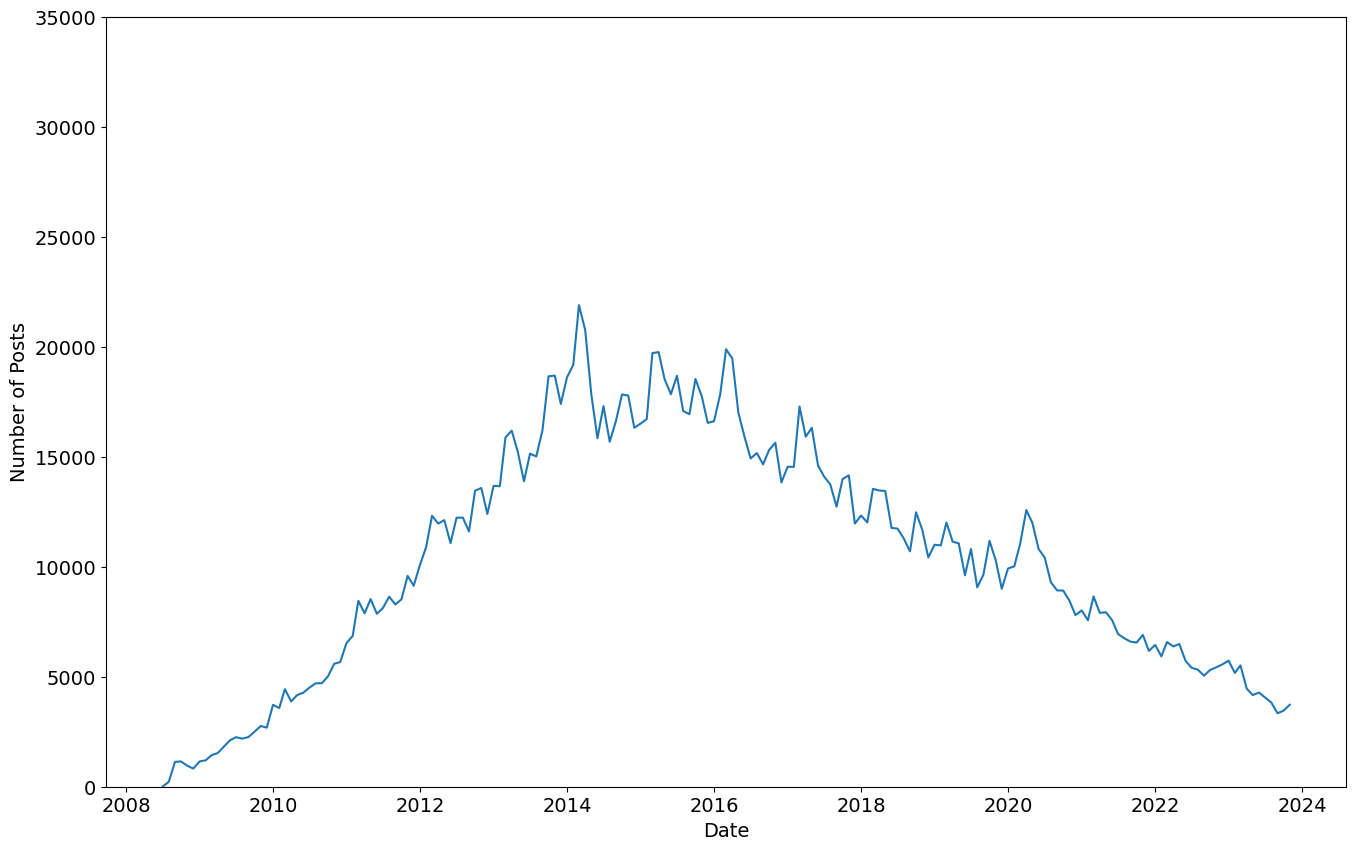

In [87]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
plt.plot(reshaped_df.index, reshaped_df['java'])

Show two line (e.g. for Java and Python) on the same chart.

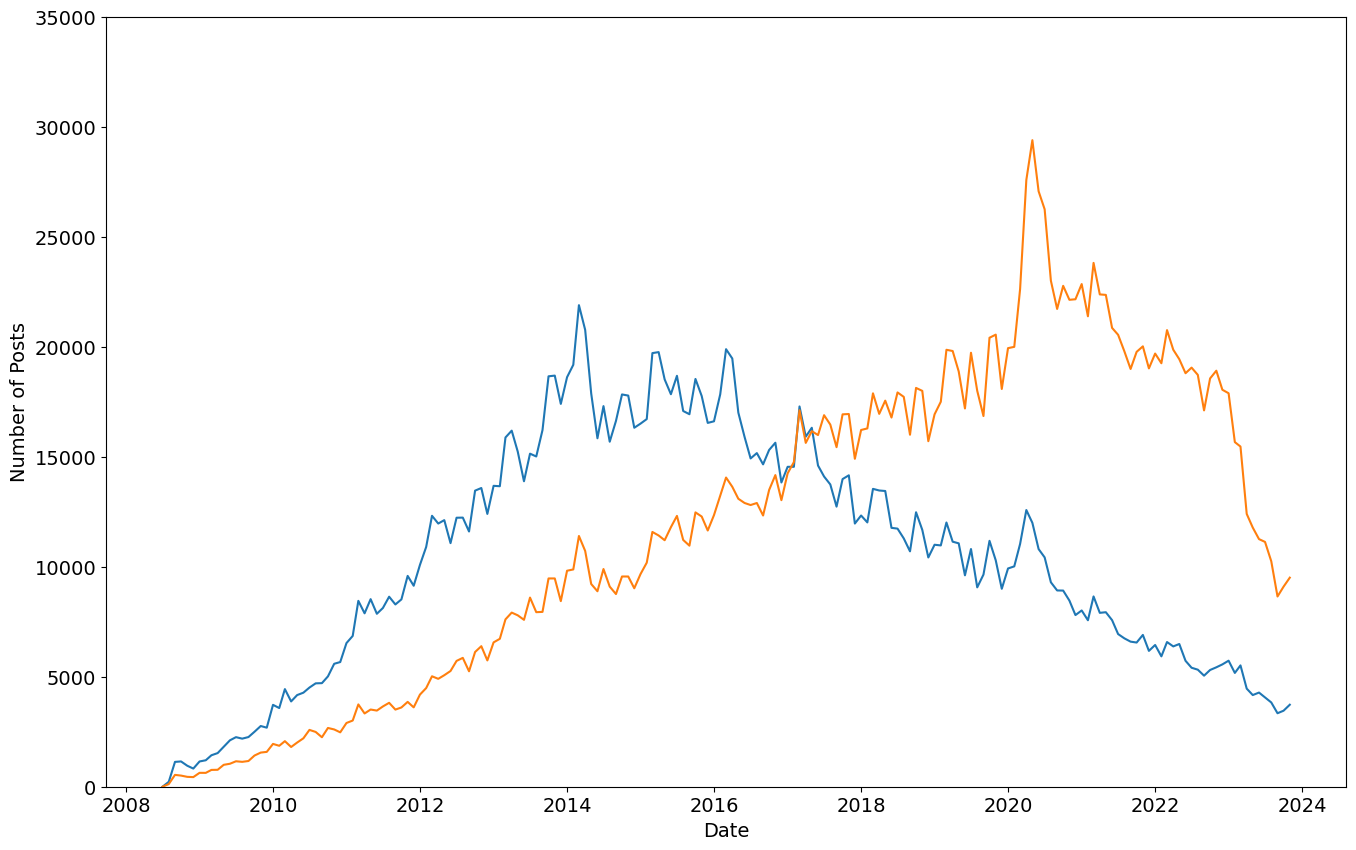

In [91]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
plt.plot(reshaped_df.index, reshaped_df[['java', 'python']])

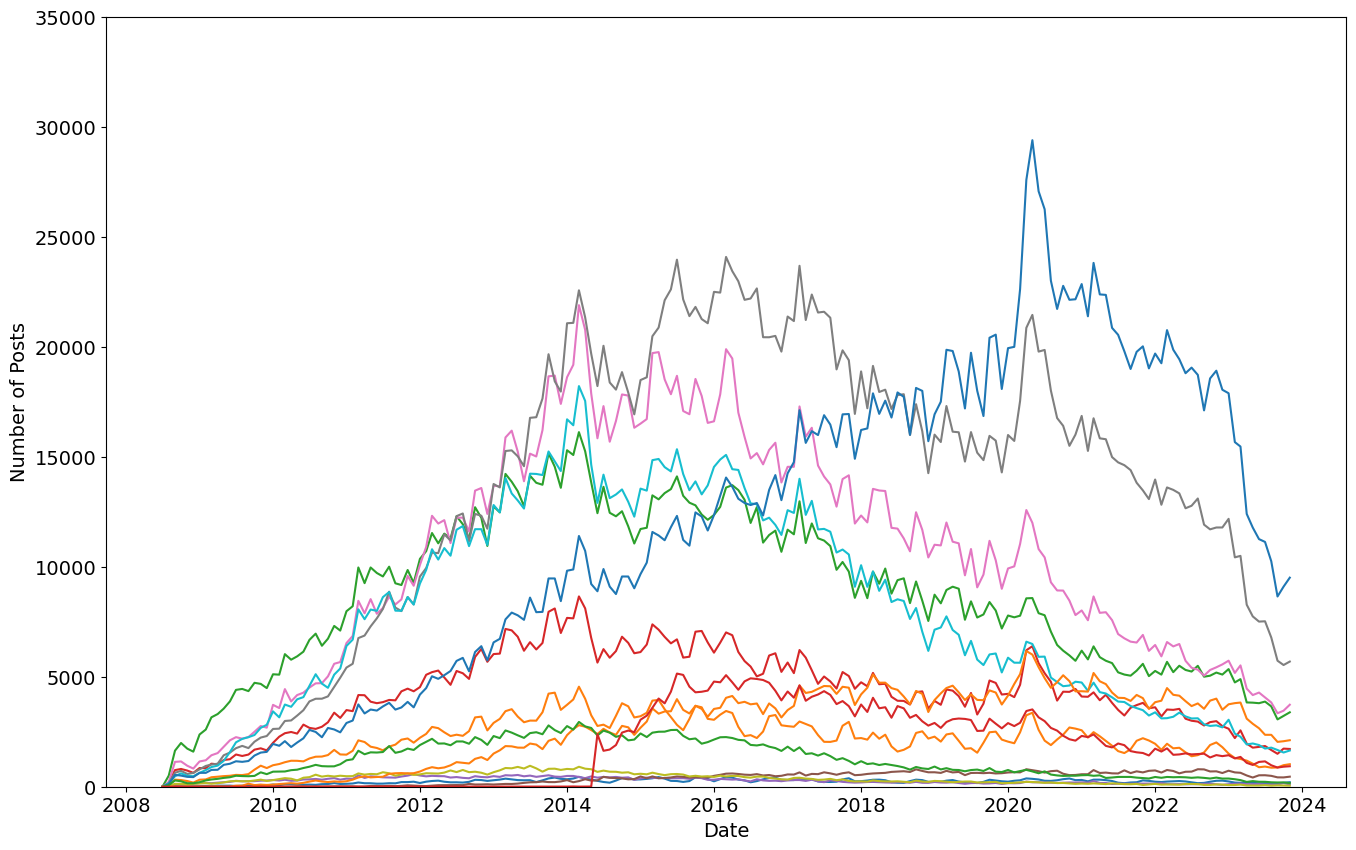

In [97]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
plt.plot(reshaped_df.index, reshaped_df)

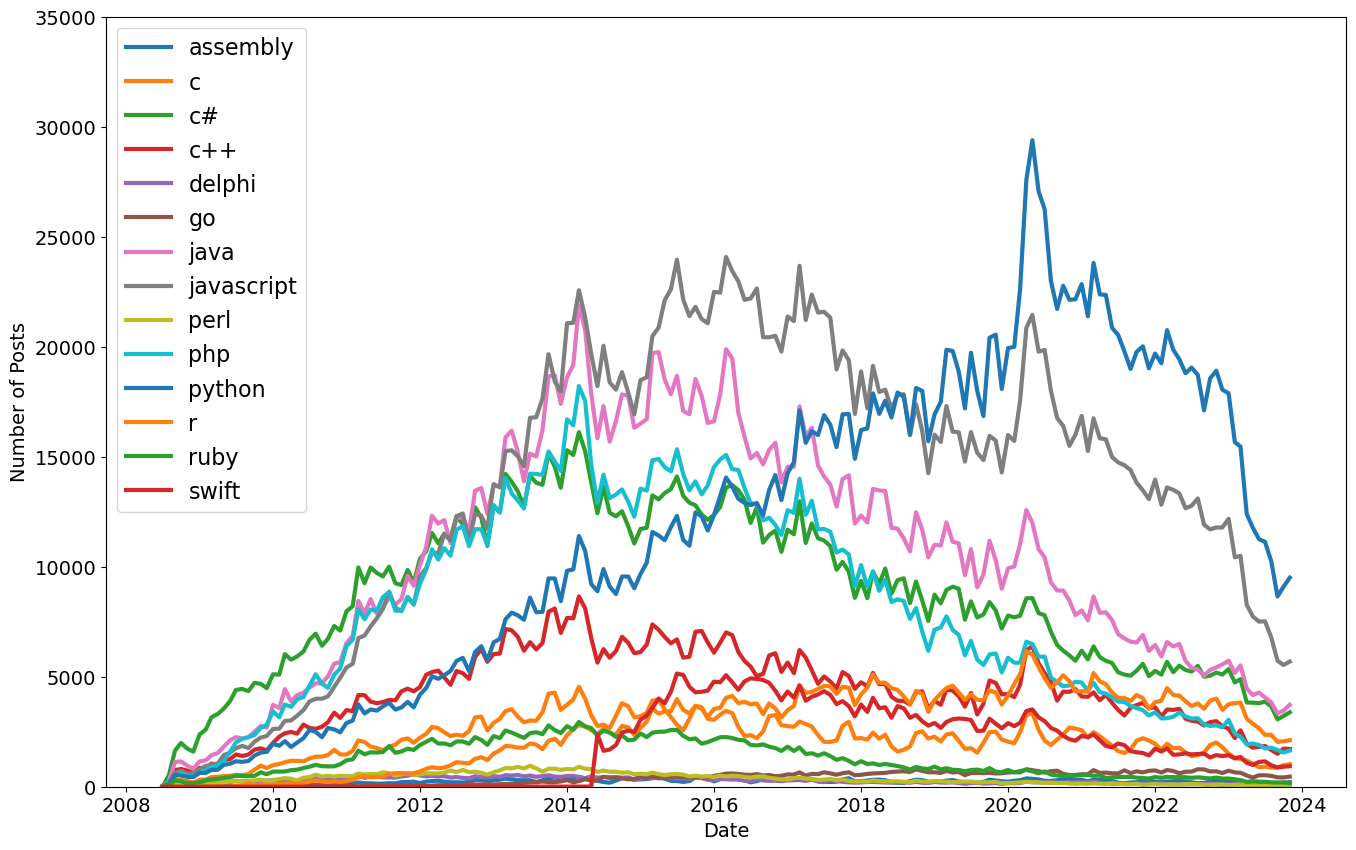

In [102]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)

for column in reshaped_df.columns:
    plt.plot(reshaped_df.index, reshaped_df[column], linewidth=3, label=reshaped_df[column].name)
plt.legend(fontsize=16)

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. Calculate a rolling mean to get a rolling average.

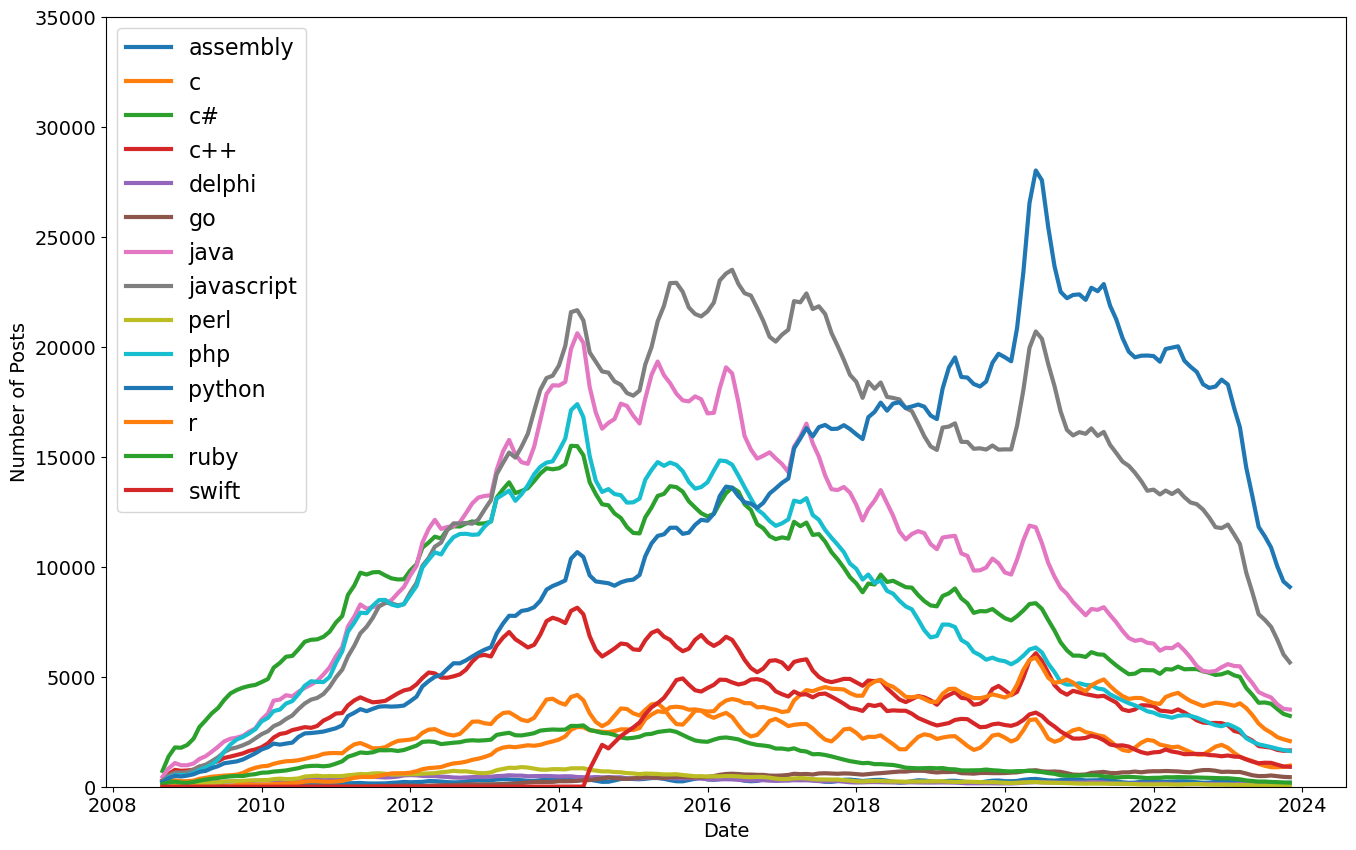

In [106]:
roll_df = reshaped_df.rolling(window=3).mean()

plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)

for column in roll_df.columns:
    plt.plot(roll_df.index, roll_df[column], linewidth=3, label=roll_df[column].name)
plt.legend(fontsize=16)

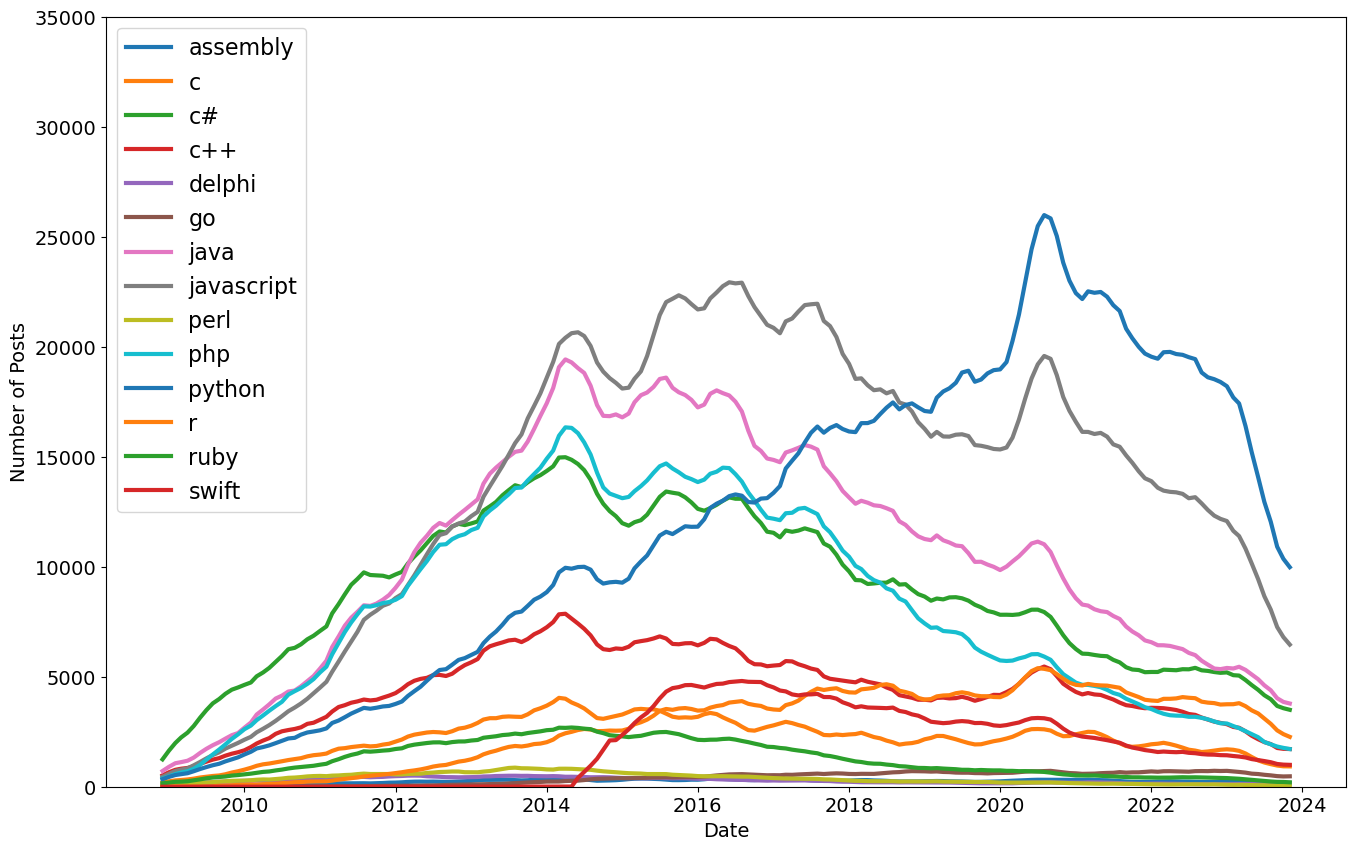

In [107]:
roll_df = reshaped_df.rolling(window=6).mean()

plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)

for column in roll_df.columns:
    plt.plot(roll_df.index, roll_df[column], linewidth=3, label=roll_df[column].name)
plt.legend(fontsize=16)

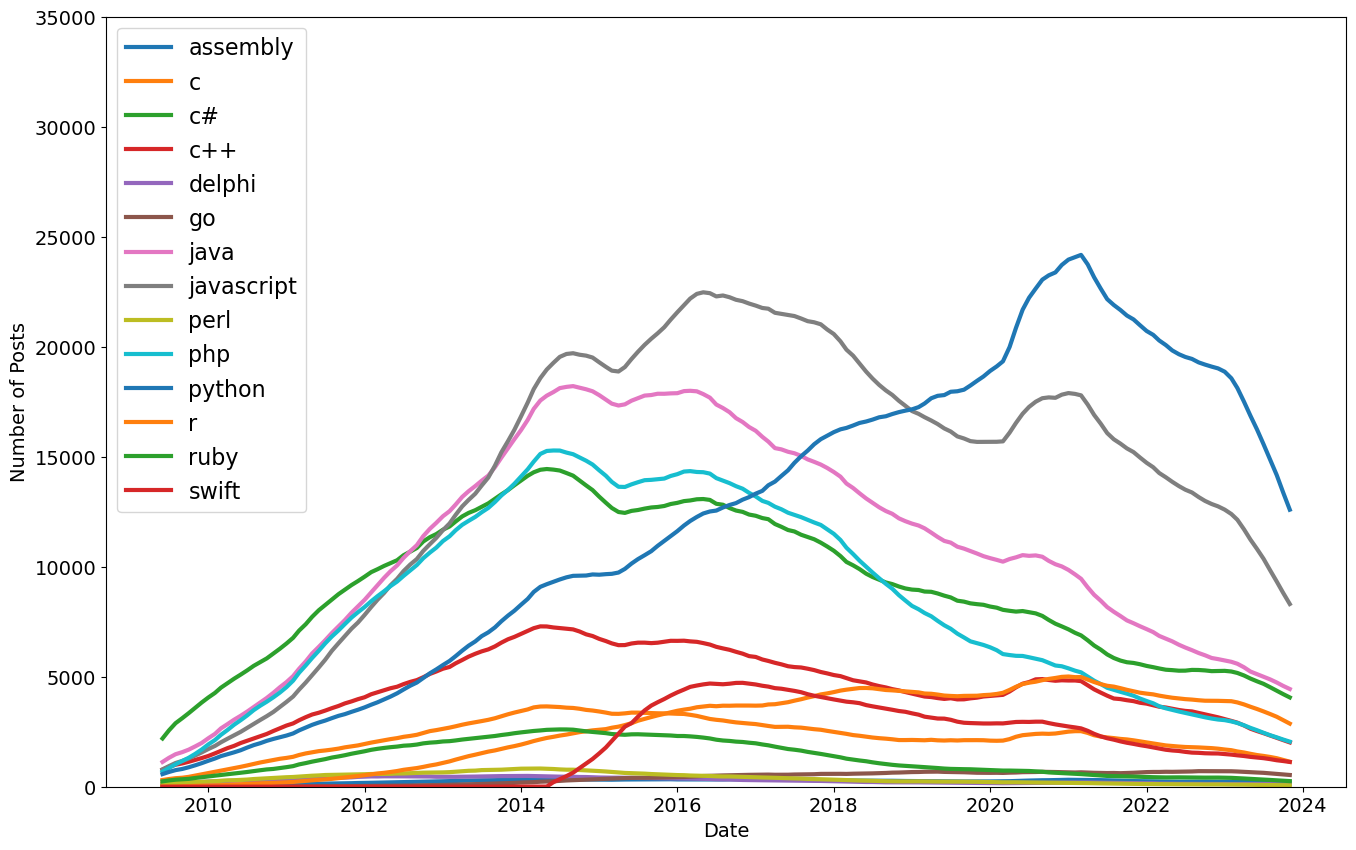

In [108]:
roll_df = reshaped_df.rolling(window=12).mean()

plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)

for column in roll_df.columns:
    plt.plot(roll_df.index, roll_df[column], linewidth=3, label=roll_df[column].name)
plt.legend(fontsize=16)

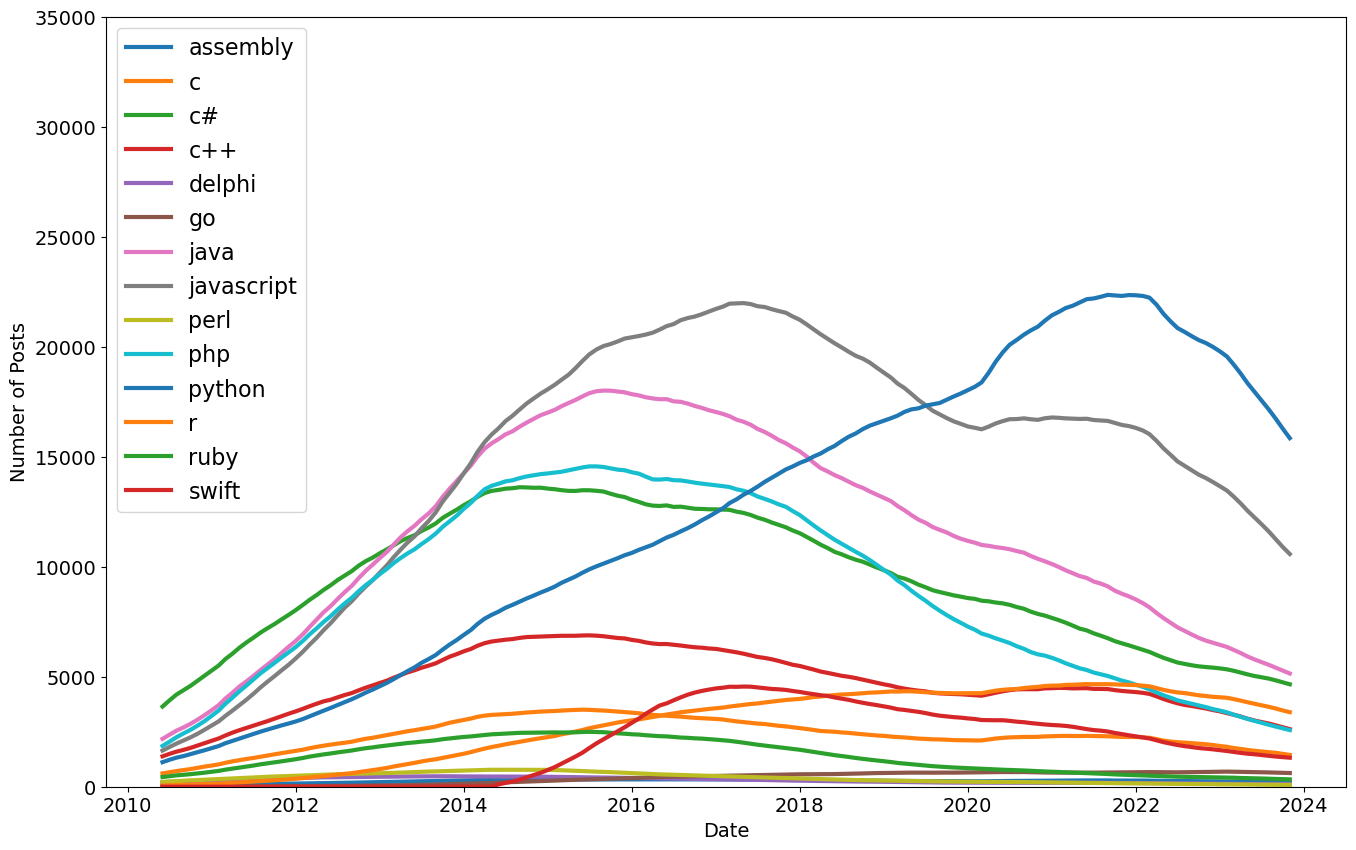

In [109]:
roll_df = reshaped_df.rolling(window=24).mean()

plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)

for column in roll_df.columns:
    plt.plot(roll_df.index, roll_df[column], linewidth=3, label=roll_df[column].name)
plt.legend(fontsize=16)

Python is the most popular programming language judging by the number of posts on StackOverflow.